## Statistics 4
### Assignment 1 Question

In [1]:
# Import modules
import numpy as np
import pandas as pd
import scipy.stats as stats

#### Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:

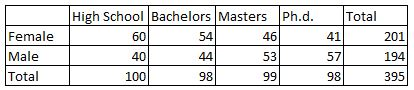

**Question:** Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

#### Chi-Square indipendence
##### H0:Null Hypothesis: Thest gender and eduation catagorical variable are indepndent
##### H1:alternate Hypothesis: Thest gender and eduation catagorical variable are dependent
##### Level of significace(5%) = 0.05

In [2]:
female_list = [60,54,46,41]
male_list = [40,44,53,57]

marks = female_list + male_list

sex = ["Female","Female","Female","Female","Male","Male","Male","Male"]
education = ["High-School", "Bachelor", "Masters", "Ph.D.","High-School", "Bachelor", "Masters", "Ph.D."]
df_education = pd.DataFrame({"Sex":sex, "Education":education, "Marks":marks})
print(df_education)

      Sex    Education  Marks
0  Female  High-School     60
1  Female     Bachelor     54
2  Female      Masters     46
3  Female        Ph.D.     41
4    Male  High-School     40
5    Male     Bachelor     44
6    Male      Masters     53
7    Male        Ph.D.     57


In [3]:
df2 = pd.crosstab(df_education.Sex, df_education.Education,df_education.Marks, aggfunc="sum", margins=True)
df2.columns = ["Bachelors", "High School", "Masters", "Ph.d.", "row_totals"]
df2.index = ["Female", "Male", "col_totals"]
df2

,Bachelors,High School,Masters,Ph.d.,row_totals
Female,54,60,46,41,201
Male,44,40,53,57,194
col_totals,98,100,99,98,395


In [4]:
#Excluding total fields
observed = df2.iloc[0:2,0:4]
observed

,Bachelors,High School,Masters,Ph.d.
Female,54,60,46,41
Male,44,40,53,57


In [5]:
expedted = np.outer(df2["row_totals"][0:2],df2.loc["col_totals"][0:4])/395.0
expedted

array([[49.86835443, 50.88607595, 50.37721519, 49.86835443],
       [48.13164557, 49.11392405, 48.62278481, 48.13164557]])

In [6]:
chi_squared_stat = ((observed - expedted)**2/expedted).sum().sum()
chi_squared_stat

8.006066246262538

In [7]:
stats.chi2_contingency(observed= observed)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[49.86835443, 50.88607595, 50.37721519, 49.86835443],
        [48.13164557, 49.11392405, 48.62278481, 48.13164557]]))

**Note:** The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have a 2x4 table so df = 1x3 = 3.

Check chi square table critical value where degree of freedome = 3 and significance level 5% = 0.05 The critical value with 3 degree of freedom is 7.815. 8.006> 7.815. 

Therefore we **reject the null hypothesis** and conclude that the education level depends on gender at a 5% level of significance.

#### Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.

[Group1: 51, 45, 33, 45, 67]

[Group2: 23, 43, 23, 43, 45]

[Group3: 56, 76, 74, 87, 56]

In [8]:
#The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.
#The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. 
#It essentially answers the question: do any of the group means differ from one another? 

#The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway()

Group1 = [51, 45, 33, 45, 67]
Group2 = [23, 43, 23, 43, 45]
Group3 = [56, 76, 74, 87, 56]

# Perform the ANOVA
statistic, pvalue = stats.f_oneway(Group1,Group2,Group3)

print("F Statistic value: {}, p-value: {}".format(statistic,pvalue))
if pvalue < 0.05:
    print('True')
else:
    print('False')

F Statistic value: 9.747205503009463, p-value: 0.0030597541434430556
True


**Note** The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. Here the p-value returned is 0.00305 which is < 0.05

#### Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.

For 10, 20, 30, 40, 50:

In [9]:
Group1 = [10, 20, 30, 40, 50]
Group2 = [5, 10, 15, 20, 25]
stats.f_oneway(Group1, Group2)

F_onewayResult(statistic=3.6, pvalue=0.0943497728424377)

In [10]:
mean_1 = np.mean(Group1)
mean_2 = np.mean(Group2)

grp1_sub_mean1 = []
grp2_sub_mean2 = []
add1 = 0
add2 = 0
for items in Group1:
    add1 += (items - mean_1)**2
for items in Group2:
    add2 += (items - mean_2)**2
var1 = add1/(len(Group1)-1)
var2 = add2/(len(Group2)-1)

F_Test = var1/var2
print(f"F Test for given {Group1} and {Group2} is: ", F_Test)

F Test for given [10, 20, 30, 40, 50] and [5, 10, 15, 20, 25] is:  4.0
